In [35]:
import pathlib
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploring chest x-ray labels

In [5]:
data_dir = pathlib.Path("../data")
labels = pd.read_csv(data_dir / "labels.csv")
labels.head()

,filename,height,width,label,xmin,ymin,xmax,ymax,view
0,00013118_008.jpg,2992,2991,Atelectasis,225.0,547.0,311.0,626.0,PA
1,00014716_007.jpg,3056,2544,Atelectasis,686.0,131.0,871.0,444.0,AP
2,00029817_009.jpg,3056,2544,Atelectasis,221.0,317.0,376.0,533.0,AP
3,00014687_001.jpg,2500,2048,Atelectasis,726.0,494.0,867.0,549.0,AP
4,00017877_001.jpg,2500,2048,Atelectasis,660.0,569.0,860.0,647.0,AP


In [7]:
print("##### LABELS #####")
labels["label"].value_counts()

##### LABELS #####


label
No Finding      980
Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: count, dtype: int64

# View particular chest x-ray label

In [52]:
IMG_HEIGHT, IMG_WIDTH = 256, 256
def load_image_as_array(img_file: str) -> np.ndarray:
    """
    Reads and converts RGB chest x-ray image into numpy array.
    
    Args
    ----
        img_file:
            Path to chest x-ray image
    Returns
    -------
        np.ndarray
            Chest x-ray image in numpy array format
    """
    img = Image.open(img_file).resize((IMG_WIDTH, IMG_HEIGHT)).convert("RGB")
    return np.array(img).reshape((IMG_HEIGHT, IMG_WIDTH, 3)).astype(np.uint8)

def get_metadata_sample(metadata: pd.DataFrame, label: str,
    n: int = 6) -> pd.DataFrame:
    """
    Sample from metadata for a specific chest x-ray label
    
    Args
    ----
        metadata: pd.DataFrame
            Table of metadata for each chest x-ray example
        label: str
            Chest x-ray label
        n: int = 6
            Sample size
    
    Returns
    -------
        pd.DataFrame
            Dataframe sample of the label
    """
    sample = metadata[metadata["label"] == label].reset_index(drop=True)
    return sample.loc[:n]

def plot_images(imgs: list[np.ndarray], label: str) -> None:
    """
    Plot chest x-ray images of given label.
    
    Args
    ----
        imgs: list[np.ndarray]
            List of images in numpy array format
        label: str
            Chest x-ray label for images

    Returns
    -------
        None
    """
    fig, ax = plt.subplots(2, 3)
    for i in range(6):
        row_idx = i // 3
        col_idx = i % 3
        ax[row_idx, col_idx].imshow(imgs[i])
        ax[row_idx, col_idx].set_xticks([])
        ax[row_idx, col_idx].set_yticks([])
    plt.suptitle(label)
    plt.show()
    

In [29]:
POS_LABEL = "Cardiomegaly"
NEG_LABEL = "No Finding"

pos_sample = get_metadata_sample(labels, POS_LABEL)
neg_sample = get_metadata_sample(labels, NEG_LABEL)

In [56]:
IMG_DIR = data_dir / "images"
pos_imgs = [load_image_as_array(IMG_DIR / img_file) for img_file in pos_sample["filename"]]
neg_imgs = [load_image_as_array(IMG_DIR / img_file) for img_file in neg_sample["filename"]]

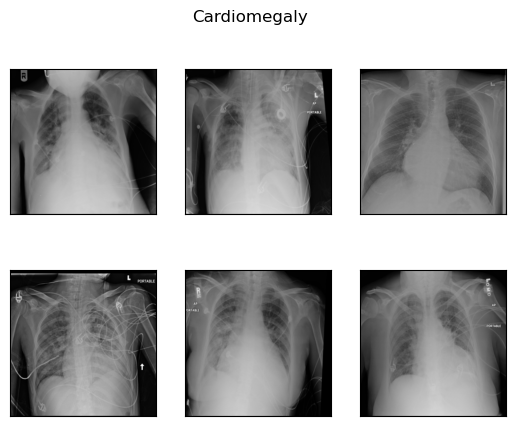

In [57]:
plot_images(pos_imgs, POS_LABEL)

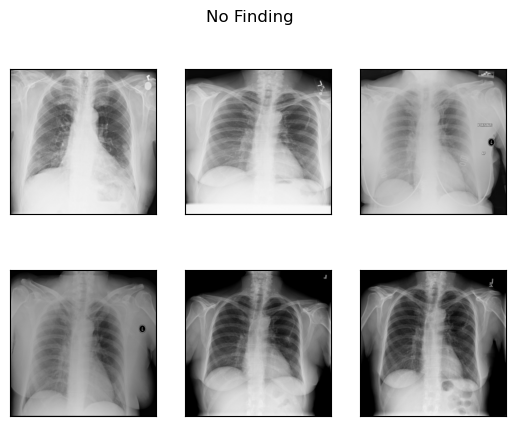

In [58]:
plot_images(neg_imgs, NEG_LABEL)